<a href="https://colab.research.google.com/github/KaueAbbe/Desigualdade_Educacional/blob/main/Analise_Exploratoria/Desigauldade_Educacional_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color = 'green' size = 6> Desigualdade Educacional - Análise Exploratória</font>

**Resumo do Projeto:**

Desigualdade Educacional é uma questão social presente em todos os países, e que ocorre por diversos motivos. Entre esses motivos há diferenças econômicas, de gênero, cor de pele, geográfica. Independente do motivo, a desigualdade reflete no poder social do país, o qual é mostrado pelo índice de desenvolvimento humano e no grupo de desenvolvimento humano ao qual o país pertence.

Dado este contexto, o projeto tem como motivação compreender como está e como evolui a desigualdade mundial no contexto da educação, conectando a relação de mudança na desigualdade índices de desenvolvimento do páis, e com alvo em relacionar o grupo de desenvolvimento do país com as outras variáveis.

**Resumo do Notebook:**



**Resumo dos Dados:**

Os dados usados nesse notebook tem origem em:
1. [Inequality in Education Around the Workd](https://www.kaggle.com/datasets/iamsouravbanerjee/inequality-in-education-around-the-world)
2. [Humam Development Reports](https://hdr.undp.org/data-center/documentation-and-downloads)

# Importar dados e Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Data Science/Projeto - Desigualdade/Desigualdade_tratado.csv')
dados.head()

,ISO3,paises,Human Development Groups,regioes,IDH(2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,taxa 2015,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021,expectativa_vida,Anos esperado de escola,media anos de escola
0,AFG,Afghanistan,Baixa,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,61.9824,10.263844,2.985070
1,ALB,Albania,Alta,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440,76.4626,14.448000,11.286455
2,DZA,Algeria,Alta,AS,91.0,33.553913,33.553913,33.553913,33.689560,33.689560,33.689560,33.689560,33.689560,33.689560,33.282620,33.282620,33.282620,76.3767,14.626896,8.069284
3,AND,Andorra,Muito Alta,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154,80.3684,13.300239,10.555120
4,AGO,Angola,Media,SSA,148.0,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,61.6434,12.172100,5.417391


#Pandas Profilling

In [ ]:
pip install pandas-profiling


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dados, title="Relatório de Perfil - Meu DataFrame", explorative=True)

<ipython-input-5-d0f8c64049e7>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
profile

In [207]:
profile.to_file("relatorio_de_perfil.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

 1. Quais são as variáveis qualitativas: Paises, Human Development Groups, Regioes, IDH.

 2. O restante são variáveis quantitativas.

 3. Existe muita correlação entre todas as taxas e com o IDH.

 4. Existem ainda alguns valores faltantes.

 5. Existe relação quasi-linear entre IDH com: expectativa de vida, Anos de escola esperado e média de anos de escola.

 # Sobre a variávels target: Grupo de desenvolvimento humano:

 1. Temos 4 categorias: Muita alta, alta, média e baixa
 2. Existe boa distribuição dos dados entre as categorias



# Sobre a variável alvo: Grupo de desenvolvimento humano


## Qual a relação por grupo do IDH médio?







In [204]:
def grupo_HDG(coluna_desejada, comentario, xfim,tit,  ascending = False):
  df = pd.DataFrame(dados.groupby(by = 'Human Development Groups').mean()[coluna_desejada])
  df = df.reset_index()
  df.sort_values(by = coluna_desejada, ascending = ascending, inplace = True)
  df[coluna_desejada] = df[coluna_desejada].round(2)

  plt.figure(figsize = (12, 6))
  cores = ['darkblue', 'darkblue'] + ['gray'] * (len(df) - 2)
  ax = sns.barplot(data = df, x = coluna_desejada, y = 'Human Development Groups', palette = cores)

  plt.suptitle(tit + 'por Grupo de Desenvolvimento Humano', fontsize = 16, y = 1.00)
  plt.ylabel('Grupo de Desenvolvimento Humano', fontsize = 13)
  plt.title(comentario, fontsize = 12, loc = 'left', color = 'darkblue')


  for i, barra in enumerate(ax.patches):
      valor = df[coluna_desejada].iloc[i]
      largura_barra = barra.get_width()
      ax.text(largura_barra +1 , barra.get_y() + barra.get_height() / 2, f'{valor}', va='center')


  plt.gca().get_xaxis().set_visible(False)
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')
  ax.spines['bottom'].set_color('none')  # Remove a borda inferior (eixo x)
  ax.spines['left'].set_color('none')

  plt.xlim(0, xfim)
  plt.show()

<ipython-input-204-bef0f4da68a9>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



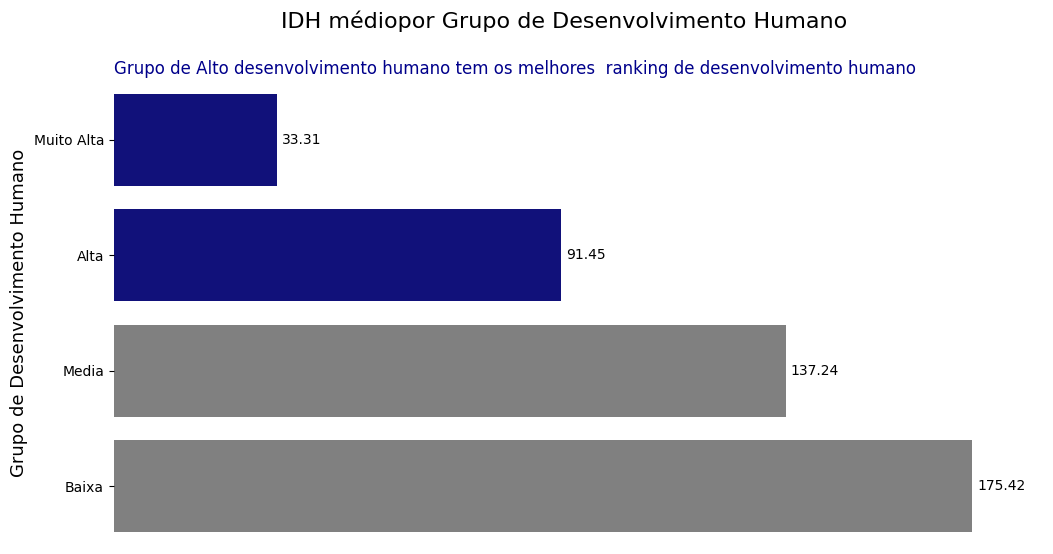

In [205]:
grupo_HDG('IDH(2021)', 'Grupo de Alto desenvolvimento humano tem os melhores  ranking de desenvolvimento humano',190, 'IDH médio', True,)

<ipython-input-204-bef0f4da68a9>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



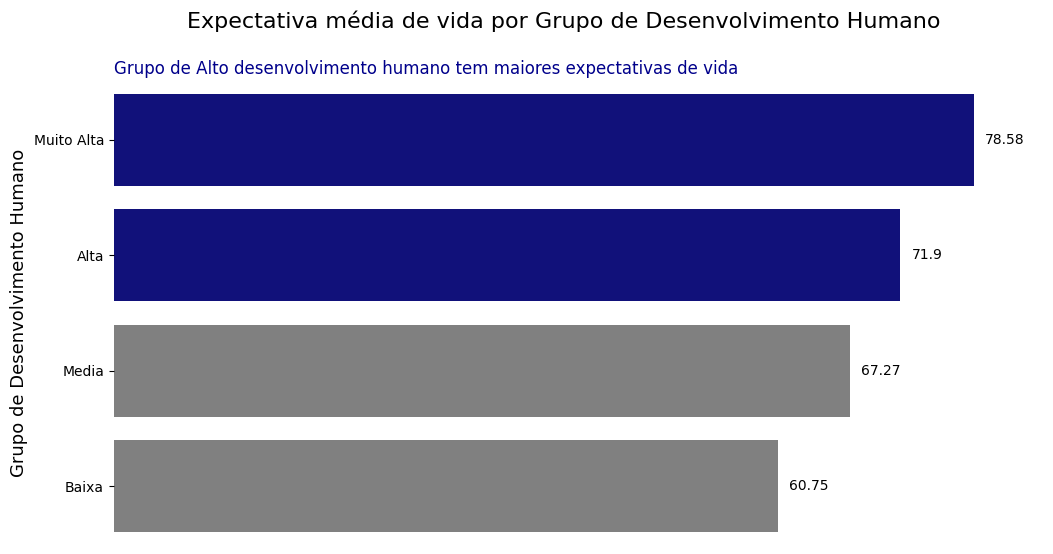

In [206]:
grupo_HDG('expectativa_vida', 'Grupo de Alto desenvolvimento humano tem maiores expectativas de vida',85, 'Expectativa média de vida ')